In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
#canceling the limitation in order to see all the columns
pd.set_option('display.max_columns', None)

In [4]:
df_answers = pd.read_csv('Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')
df_weather = pd.read_excel('cleaned_weather_data2.xlsx')

In [5]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
scaler = StandardScaler()

In [7]:
# Scalng df_weather
columns = df_weather.columns.tolist()
df_scaled_weather = pd.DataFrame(scaler.fit_transform(df_weather), columns=columns)
df_scaled_weather.head()

,BASEL_humidity,BASEL_pressure,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,DEBILT_humidity,DEBILT_pressure,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,KASSEL_humidity,KASSEL_pressure,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MADRID_humidity,MADRID_pressure,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,OSLO_humidity,OSLO_pressure,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean
0,0.828178,-0.017886,-0.245455,-0.902918,-0.536739,0.905641,0.333135,-0.449344,0.283983,-1.018026,-0.019888,0.007521,-0.383182,-0.773378,-1.099956,0.343497,-1.285671,0.225364,-1.077312,-0.119662,0.627082,-0.026866,-0.298065,-1.014908,-0.109446,1.339614,-1.439298,0.394420,-1.064721,-0.106777,0.445250,-0.849681,1.356620,-0.647692,-0.191279,1.874912,-0.014975,-0.467368,-1.149211,-1.372069,0.255540,-1.089689,0.534111,-0.810834,-0.102962,1.887115,1.260995,-0.364569,-1.521762,-0.988280,-0.762475,-0.278930,-1.098059,-0.272202,1.547386,-1.190818,3.066166,-1.023256,-0.188730,-0.832133,-0.146284,-0.704260,-0.550327,-0.131817,-0.054567,0.967161,-1.013295,-0.396147,0.775349,-1.400173,-0.077394,0.442216,-0.684401
1,0.736947,-0.017886,2.807575,-0.810126,-0.591447,1.119798,0.018713,-0.449344,-1.333204,-1.108883,-0.019888,0.007521,0.911327,-1.344065,-1.111725,0.890019,-1.033746,-0.384741,-1.052820,-0.374763,1.159804,-0.026866,1.754492,-0.893696,-0.375967,2.018335,-1.034363,0.436393,-1.064721,-0.895065,0.826755,-0.949575,0.482661,-1.075217,-0.221125,1.406049,-0.014975,-0.242130,-0.420517,-1.044925,1.092387,-1.100750,4.043373,-0.958969,-0.239209,1.548493,1.173178,-0.364569,-1.642337,-0.691740,-0.355618,0.269676,0.043394,-0.360817,-0.717343,0.182408,-0.523702,-1.023256,-0.371233,0.761503,-0.294243,0.330551,-1.073269,-0.663743,-0.054567,-0.239203,-1.013295,-0.421154,1.220178,-1.360860,0.937510,-0.847371,-0.561989
2,1.284329,-0.017886,0.422396,-1.065304,-0.263202,0.620099,0.114406,-0.449344,-0.524611,-1.086169,-0.019888,0.007521,-0.426332,-1.195190,-1.064650,1.108627,0.110418,-0.545295,-0.342557,-0.518257,1.692526,-0.026866,-0.333454,-1.014908,-0.538841,1.824414,0.101433,-0.235182,-1.039671,-0.492163,1.303635,-0.412649,1.856025,-1.075217,-0.400198,1.562337,-0.014975,-0.259456,-1.149211,-0.742013,1.557301,0.060652,1.015774,-1.057726,-0.496563,1.774241,1.656169,-0.364569,-1.304726,-0.853490,1.190437,0.269676,-1.098059,-0.411455,-0.276979,0.992696,-0.271782,-1.023256,-0.553737,0.495897,0.050994,0.099821,-1.073269,-0.663743,-0.054567,-0.424798,-1.013295,-0.621207,1.220178,-0.486154,-0.605145,-1.040809,-0.072341
3,1.466790,-0.017886,-0.531676,-0.114186,-0.564093,1.762268,1.331084,-0.449344,-1.333204,-1.211098,-0.019888,0.007521,-0.426332,-1.344065,-1.147031,1.436540,1.160109,-0.288409,-1.077312,-0.534201,0.893443,-0.026866,-0.510399,-1.014908,-0.583262,2.018335,0.733528,-0.528996,-1.064721,-0.316988,0.922131,1.597700,-0.641000,-1.075217,-0.504657,1.406049,-0.014975,-0.467368,-0.648234,-0.911644,0.813438,1.277360,-0.566834,-0.983659,-0.481425,0.927685,1.568353,-0.364569,0.238641,-0.624345,1.109066,-0.52580

In [8]:
df_basel = df_scaled_weather[['BASEL_humidity', 'BASEL_pressure', 'BASEL_precipitation',  'BASEL_sunshine', 'BASEL_temp_mean']]

In [9]:
df_basel_answer = df_answers['BASEL_pleasant_weather']

In [10]:
X = df_basel
y = df_basel_answer

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')

Training Accuracy: 0.96
Testing Accuracy: 0.96


In [16]:
df_scaled_weather.columns

Index(['BASEL_humidity', 'BASEL_pressure', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BELGRADE_humidity',
       'BELGRADE_pressure', 'BELGRADE_precipitation', 'BELGRADE_sunshine',
       'BELGRADE_temp_mean', 'BUDAPEST_humidity', 'BUDAPEST_pressure',
       'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean',
       'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_precipitation',
       'DEBILT_sunshine', 'DEBILT_temp_mean', 'DUSSELDORF_humidity',
       'DUSSELDORF_pressure', 'DUSSELDORF_precipitation',
       'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'HEATHROW_humidity',
       'HEATHROW_pressure', 'HEATHROW_precipitation', 'HEATHROW_sunshine',
       'HEATHROW_temp_mean', 'KASSEL_humidity', 'KASSEL_pressure',
       'KASSEL_precipitation', 'KASSEL_sunshine', 'KASSEL_temp_mean',
       'LJUBLJANA_humidity', 'LJUBLJANA_pressure', 'LJUBLJANA_precipitation',
       'LJUBLJANA_sunshine', 'LJUBLJANA_temp_mean', 'MAASTRICHT_humidity',
       'MAA

In [17]:
df_answers.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [18]:
cities = ['HEATHROW', 'SONNBLICK','STOCKHOLM', 'MADRID', 'LJUBLJANA', 'DEBILT', 'MUNCHENB', 'BUDAPEST', 'KASSEL', 'MAASTRICHT',
 'DUSSELDORF', 'OSLO', 'BASEL', 'BELGRADE', 'VALENTIA']

In [23]:
for city in cities:
    # Select columns from df_scaled_weather that contain the city
    X_columns = [col for col in df_scaled_weather.columns if city in col]
    X = df_scaled_weather[X_columns]

    # Select the corresponding column from df_answers
    y_column = f'{city}_pleasant_weather'
    y = df_answers[y_column]

    # Check if there are at least two unique values in the target variable
    if len(y.unique()) < 2:
        print(f'{city} - Insufficient classes in the target variable. Skipping...')
        continue

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a logistic regression model
    model = LogisticRegression()

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    y_train_pred = model.predict(X_train)

    # Make predictions on the testing set
    y_test_pred = model.predict(X_test)

    # Evaluate and print the accuracy scores
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    print(f'{city} - Training Accuracy: {accuracy_train:.2f}, Testing Accuracy: {accuracy_test:.2f}')

HEATHROW - Training Accuracy: 0.94, Testing Accuracy: 0.94
SONNBLICK - Insufficient classes in the target variable. Skipping...
STOCKHOLM - Training Accuracy: 0.97, Testing Accuracy: 0.97
MADRID - Training Accuracy: 0.96, Testing Accuracy: 0.96
LJUBLJANA - Training Accuracy: 0.95, Testing Accuracy: 0.95
DEBILT - Training Accuracy: 0.96, Testing Accuracy: 0.96
MUNCHENB - Training Accuracy: 0.96, Testing Accuracy: 0.96
BUDAPEST - Training Accuracy: 0.96, Testing Accuracy: 0.96
KASSEL - Training Accuracy: 0.97, Testing Accuracy: 0.97
MAASTRICHT - Training Accuracy: 0.96, Testing Accuracy: 0.96
DUSSELDORF - Training Accuracy: 0.96, Testing Accuracy: 0.95
OSLO - Training Accuracy: 0.97, Testing Accuracy: 0.97
BASEL - Training Accuracy: 0.96, Testing Accuracy: 0.96
BELGRADE - Training Accuracy: 0.95, Testing Accuracy: 0.96
VALENTIA - Training Accuracy: 0.97, Testing Accuracy: 0.97


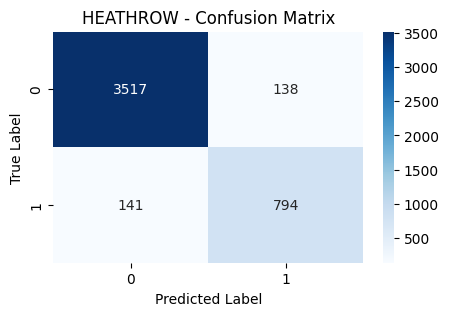

SONNBLICK - Insufficient classes in the target variable. Skipping...


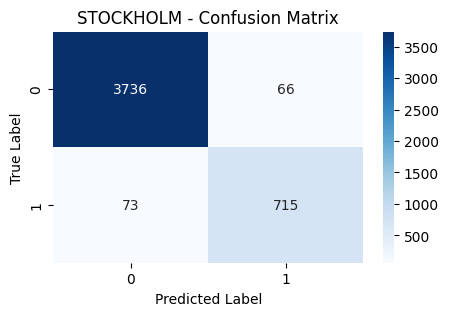

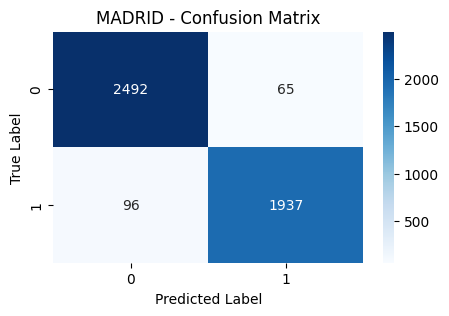

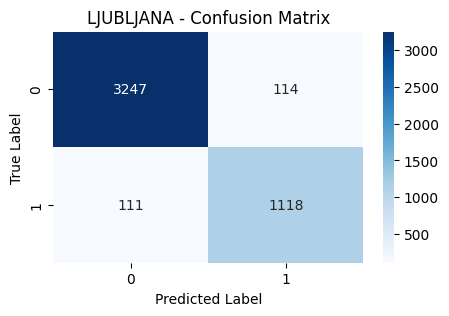

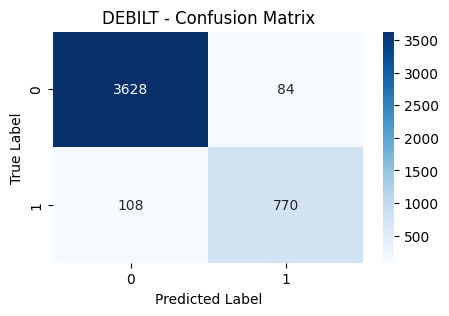

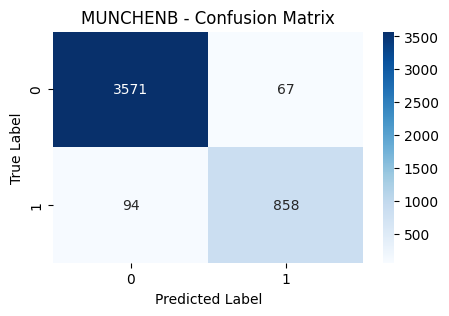

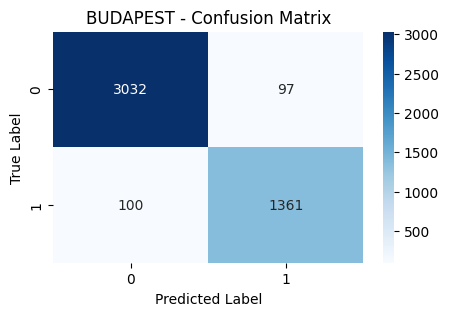

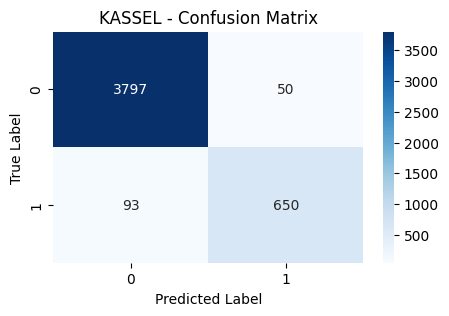

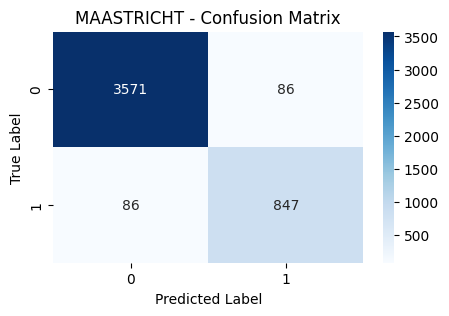

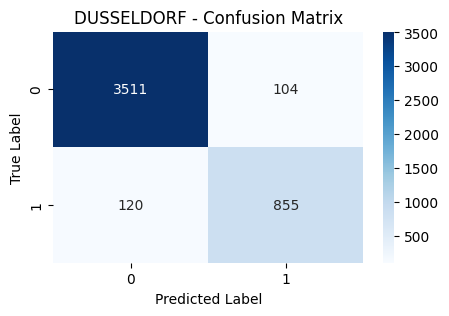

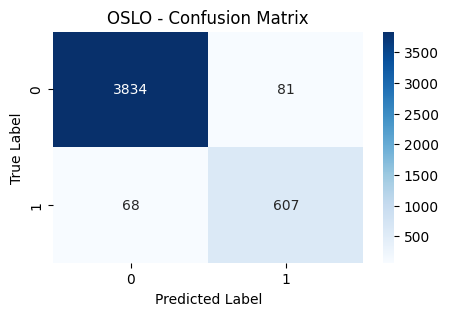

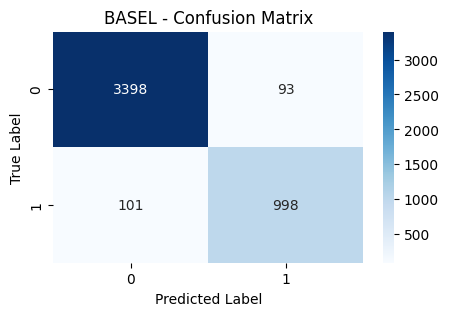

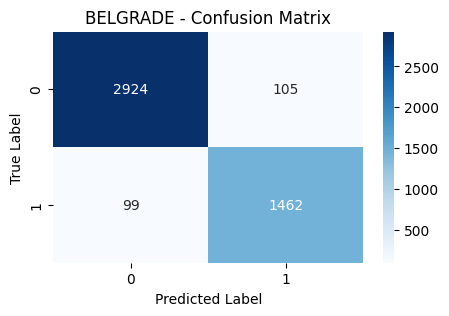

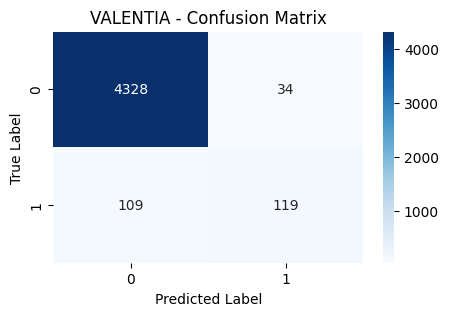

In [26]:
for city in cities:
    # Select columns from df_scaled_weather that contain the city
    X_columns = [col for col in df_scaled_weather.columns if city in col]
    X = df_scaled_weather[X_columns]

    # Select the corresponding column from df_answers
    y_column = f'{city}_pleasant_weather'
    y = df_answers[y_column]

    # Check if there are at least two unique values in the target variable
    if len(y.unique()) < 2:
        print(f'{city} - Insufficient classes in the target variable. Skipping...')
        continue

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a logistic regression model
    model = LogisticRegression()

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_test_pred = model.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Visualize the confusion matrix as a heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title(f'{city} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()